In [2]:
from generate_lib import *

In [3]:
SHOW_PLOTS = True
SAVE_PLOTS = True

In [4]:
def get_frac_variance(idx_range):    
    frac_variances = {
        'random': list(),
        'aligned': list()
    }
    
    suffix = '_randomO'

    for idx in idx_range:
        filename = data_files[idx]

        # Gets the file path to the desired data.
        p = os.path.join(path, filename)

        # Gets the expecation values as an ordered list.
        data = get_data(p)['axes']['y']

        # Calculates the fractional variance.
        max = np.nanmax(data)
        min = np.nanmin(data)
        median = np.nanmedian(data)
        frac_variance = (max - min) / median

        # Checks for outliers.
        if frac_variance > 1.0:
            output = '''High fractional variance in {file}! Skipped this data. Check the file for potential bad data.

            Fractional variance: {fv}
            Max expectation value: {max}
            Min expectation value: {min}
            Median expectation value: {median}
            File index: {idx}
            '''.format(fv = frac_variance, max = max, min = min, median = median, idx = idx, file = filename.replace('.csv', ''))

            print(output)

            continue
        
        # Chooses the 'random' key if the suffix is in the filename, otherwise it chooses the 'random' key.
        key = ['aligned', 'random'][(suffix in filename)]

        # Appends the fractional variance to a list.
        frac_variances[key].append(frac_variance)    

    return frac_variances

def plot_data(data, idx_range, savename):
    (fig, axes) = plt.subplots(2, 2)
    fig.set_size_inches(12, 12)

    (x, logx) = (data['aligned'], np.log10(data['aligned']))
    (rx, rlogx) = (data['random'], np.log10(data['random']))

    suffix = '_randomO'

    system1_name = data_files[idx_range[0]].replace(suffix, '').replace('.csv', '')
    systemn_name = data_files[idx_range[-1]].replace(suffix, '').replace('.csv', '')

    label = '{f1}-{f2}'.format(f1 = system1_name, f2 = systemn_name)
    rlabel = '{f1}-{f2}'.format(f1 = system1_name + suffix, f2 = systemn_name + suffix)

    plt.subplot(2, 2, 1)
    plt.hist(x, bins = 9, color = 'red', label = label)

    plt.subplot(2, 2, 2)
    plt.hist(logx, bins = 9, color = 'red')

    plt.subplot(2, 2, 3)
    plt.hist(rx, bins = 9, label = rlabel)

    plt.subplot(2, 2, 4)
    plt.hist(rlogx, bins = 9)

    for row in range(len(axes)):
        for col in range(len(axes[row])):
            ax = axes[row][col]
            
            xlabel = 'Log10 Fractional Variance log10((max - min) / median)' if (col == 1) else 'Fractional Variance ((max - min) / median)'
            ylabel = 'Frequency (Random $\Omega$)' if (row == 1) else 'Frequency (Aligned $\Omega$)'

            if row == 1:
                ax.set_xlabel(xlabel, fontsize = 12)
    
            (min_variance, max_variance) = (None, None)

            if col == 0:
                ax.set_ylabel(ylabel, fontsize = 12)
                
                if row == 0:
                    min_variance = np.min(x)
                    max_variance = np.max(x)
                else:
                    min_variance = np.min(rx)
                    max_variance = np.max(rx)
            else:
                if row == 0:
                    min_variance = np.min(logx)
                    max_variance = np.max(logx)
                else:
                    min_variance = np.min(rlogx)
                    max_variance = np.max(rlogx)

            ax.set_xlim(min_variance, max_variance)

            ax.xaxis.set_major_locator(tck.LinearLocator(numticks = 10))
            ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%.3f'))

    fig.legend(bbox_to_anchor = (0.64, 0.95))

    plt.subplots_adjust(wspace = 0.15, hspace = 0.1)
    plt.suptitle('Distribution of Fractional Variance of Expectation Values', fontsize = 15)

    if SHOW_PLOTS:
        plt.show()

    if SAVE_PLOTS:
        save_path = os.path.join(os.pardir, 'results', 'frac-variation', savename)
        fig.savefig(save_path, dpi = 300)


In [5]:
def run(idx_range):
    data = get_frac_variance(idx_range)

    plot_data(data, idx_range, 'frac-variance-histogram')

High fractional variance in sysSim_16_randomO! Skipped this data. Check the file for potential bad data.

            Fractional variance: 1.1740593776742352
            Max expectation value: 0.03527284004068147
            Min expectation value: 0.009178725921979132
            Median expectation value: 0.02222554890741024
            File index: 32
            
High fractional variance in sysSim_61_randomO! Skipped this data. Check the file for potential bad data.

            Fractional variance: 1.0408480090889745
            Max expectation value: 0.05075287223020404
            Min expectation value: 0.020645484816452786
            Median expectation value: 0.028925825049234057
            File index: 122
            
High fractional variance in sysSim_88! Skipped this data. Check the file for potential bad data.

            Fractional variance: 4.386108769272662
            Max expectation value: 6.678350714266214
            Min expectation value: 0.061278593042503514
      

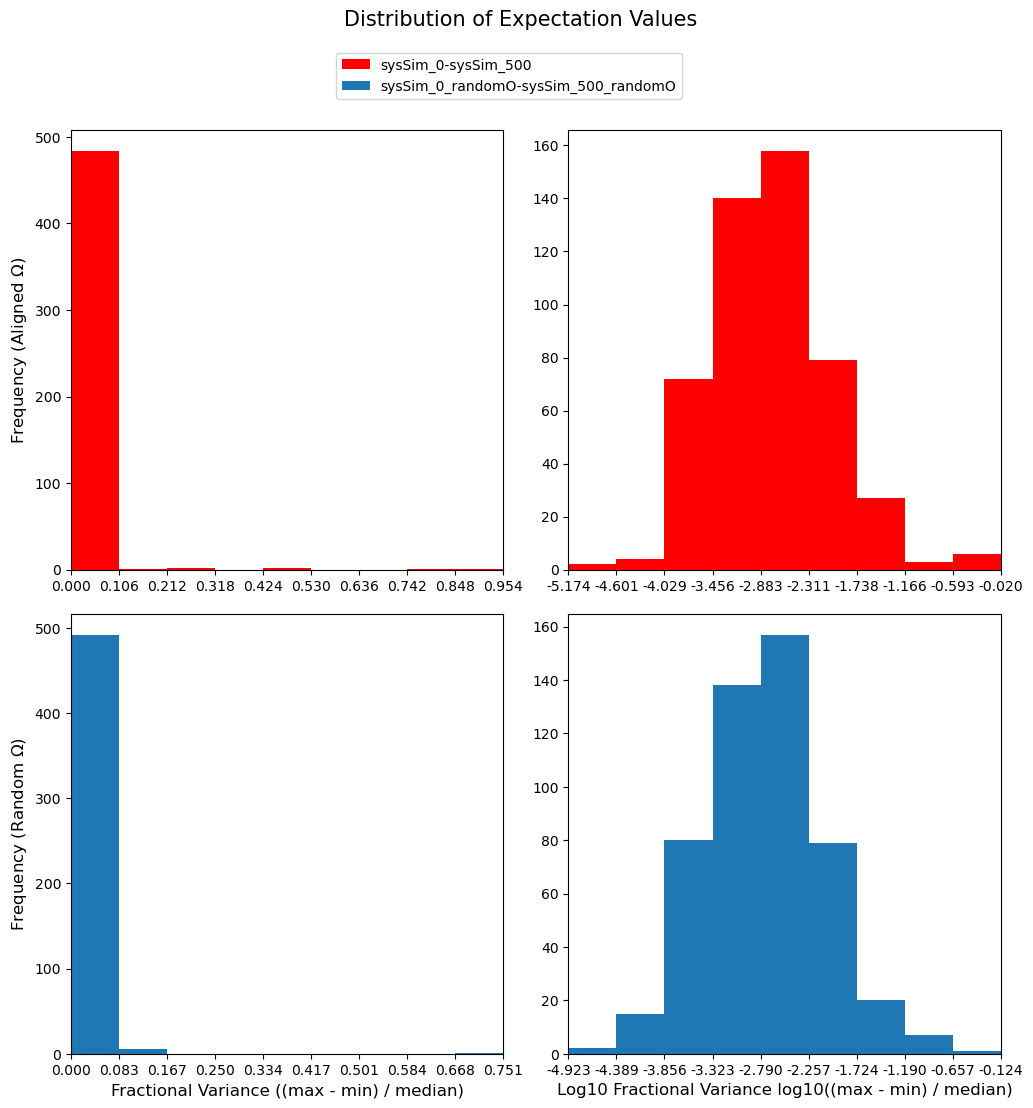

In [6]:
r = list(range(round(len(data_files)*0.5)))

run(r)